In [2]:
import pandas as pd
import matplotlib

import sys
from dotenv import load_dotenv
import os
load_dotenv()
sys.path.append(os.getenv("ROOT"))

from connector.cassandra_connector import get_session, create_and_set_keyspace, get_dataframe
session = get_session()
create_and_set_keyspace(session)

pd.set_option("display.max_columns", None)


In [3]:
from connector.cassandra_connector import get_session, create_and_set_keyspace, get_dataframe
session = get_session()
create_and_set_keyspace(session)

In [4]:
df = get_dataframe(session)

<Axes: >

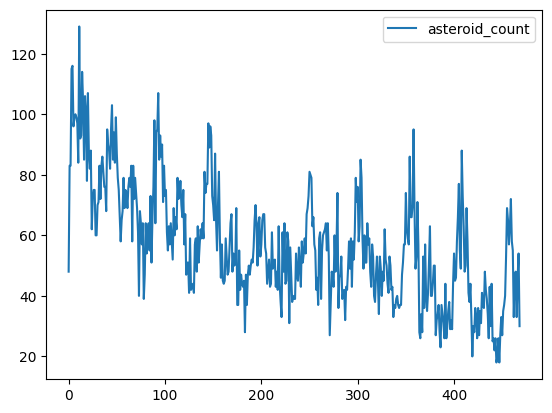

In [5]:
df.groupby(df['date_system_recorded'].dt.to_period("W")).size().reset_index(name='asteroid_count').plot()

/tmp/ipykernel_320708/4222350484.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


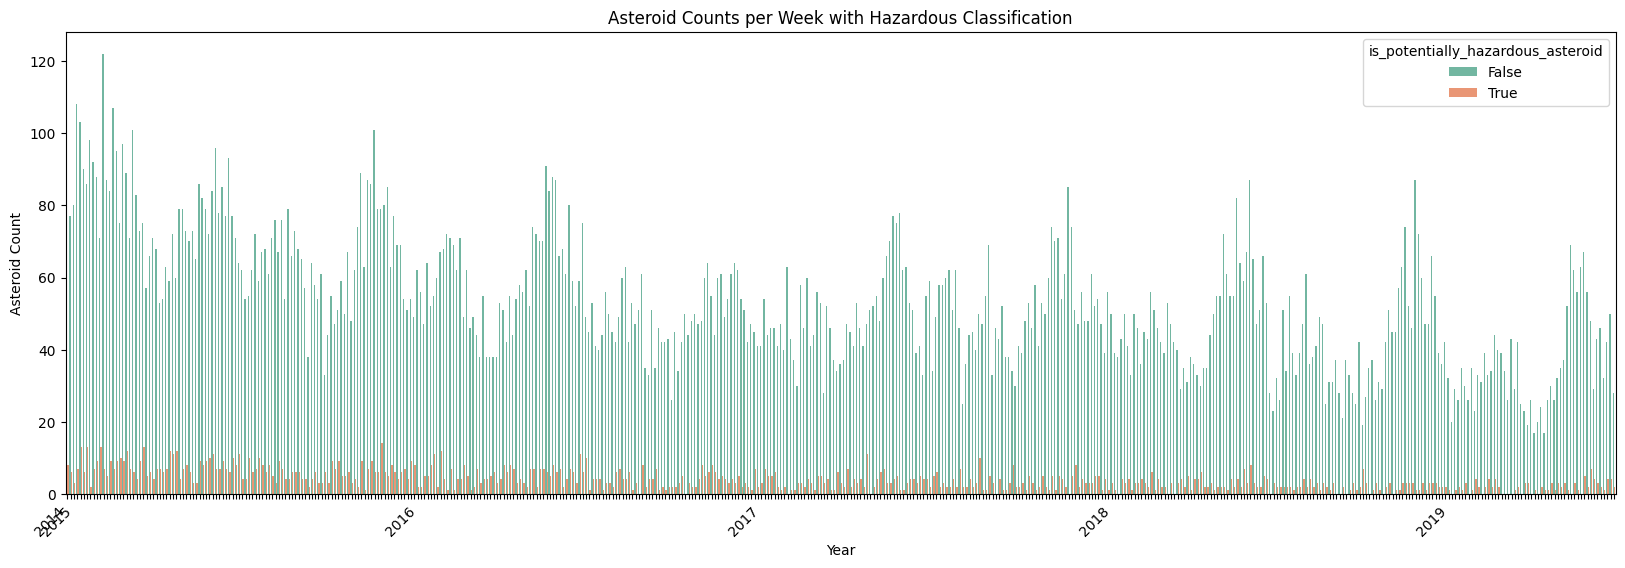

In [6]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weekly_counts = df.groupby([df['date_system_recorded'].dt.to_period("W"), 'is_potentially_hazardous_asteroid']).size().reset_index(name='asteroid_count')

# Plot using seaborn and matplotlib
plt.figure(figsize=(20, 6))  # Set the figure size as needed
ax = sns.barplot(data=weekly_counts, x='date_system_recorded', y='asteroid_count', hue='is_potentially_hazardous_asteroid', palette='Set2')

# Format x-axis labels to display year only when it changes
labels = [period.strftime('%Y') if i == 0 or period.year != weekly_counts['date_system_recorded'].iloc[i - 1].year else '' for i, period in enumerate(weekly_counts['date_system_recorded'])]
ax.set_xticklabels(labels, rotation=45, ha='right')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Asteroid Count')
plt.title('Asteroid Counts per Week with Hazardous Classification')

# Display the plot
plt.show()

In [7]:
df

,id,absolute_magnitude_h,close_approach_date,close_approach_date_full,date_system_recorded,epoch_date_close_approach,estimated_diameter_max,estimated_diameter_min,is_potentially_hazardous_asteroid,is_sentry_object,links,miss_distance_astronomical,miss_distance_lunar,miss_distance_meters,name,nasa_jpl_url,neo_reference_id,orbiting_body,relative_velocity
0,54210564,24.90,2017-10-02,2017-Oct-02 13:35,2017-10-01 18:15:00,1506951300000,62.235757,27.832677,False,False,http://api.nasa.gov/neo/rest/v1/neo/54210564?a...,0.3193444197,124.2249792633,4.777324e+10,(2021 SL28),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,54210564,Earth,18405.108557
1,3370021,22.25,2015-01-15,2015-Jan-15 19:37,2015-01-14 18:15:00,1421350620000,210.882227,94.309399,False,False,http://api.nasa.gov/neo/rest/v1/neo/3370021?ap...,0.0274543625,10.6797470125,4.107114e+09,(2007 EC),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,3370021,Earth,6595.401947
2,2510238,20.75,2016-06-27,2016-Jun-27 02:55,2016-06-26 18:15:00,1466996100000,420.765360,188.171989,False,False,http://api.nasa.gov/neo/rest/v1/neo/2510238?ap...,0.1152949376,44.8497307264,1.724788e+10,510238 (2011 FC29),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,2510238,Earth,13013.164594
3,54215203,27.85,2016-10-16,2016-Oct-16 10:13,2016-10-15 18:15:00,1476612780000,15.997053,7.154100,False,False,http://api.nasa.gov/neo/rest/v1/neo/54215203?a...,0.4585064569,178.3590117341,6.859159e+10,(2021 VF),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,54215203,Earth,22288.738794
4,3838137,26.00,2015-09-05,2015-Sep-05 03:18,2015-09-04 18:15:00,1441423080000,37.500752,16.770846,False,False,http://api.nasa.gov/neo/rest/v1/neo/3838137?ap...,0.3103283209,120.7177168301,4.642446e+10,(2019 CB2),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,3838137,Earth,21853.576194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26797,3838214,25.30,2019-01-29,2019-Jan-29 20:45,2019-01-28 18:15:00,1548794700000,51.765448,23.150212,False,False,http://api.nasa.gov/neo/rest/v1/neo/3838214?ap...,0.0259141926,10.0806209214,3.876708e+09,(2019 CF3),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,3838214,Earth,12194.126526
26798,3773987,26.70,2015-09-01,2015-Sep-01 02:35,2015-08-31 18:15:00,1441074900000,27.166893,12.149404,False,False,http://api.nasa.gov/neo/rest/v1/neo/3773987?ap...,0.0428875404,16.6832532156,6.415885e+09,(2017 HD),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,3773987,Earth,11117.299675
26799,3843706,23.20,2017-11-12,2017-Nov-12 05:02,2017-11-11 18:15:00,1510462920000,136.157002,60.891262,False,False,http://api.nasa.gov/neo/rest/v1/neo/3843706?ap...,0.3115307664,121.1854681296,4.660434e+10,(2019 QK6),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,3843706,Earth,12199.021196
26800,54017180,24.80,2020-06-13,2020-Jun-13 21:36,2020-06-12 18:15:00,1592084160000,65.168838,29.144390,False,False,http://api.nasa.gov/neo/rest/v1/neo/54017180?a...,0.008067458,3.138241162,1.206875e+09,(2020 KB3),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,54017180,Earth,7536.222393
